In [21]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as req
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
req.urlretrieve(url,'ame.txt')

('ame.txt', <http.client.HTTPMessage at 0x2786547cd68>)

In [3]:
df = pd.read_csv('ame.txt','\t',usecols=range(1,6))

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

In [9]:
df_norm = (df - df.mean(axis=0))/df.std(axis=0)
df_norm = df_norm.drop('Species',axis=1)

In [22]:
pca = PCA(3)
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
feature = pca.transform(df_norm)
feature

array([[-2.25714118,  0.47842383, -0.12727962],
       [-2.07401302, -0.67188269, -0.23382552],
       [-2.35633511, -0.34076642,  0.0440539 ],
       [-2.29170679, -0.59539986,  0.0909853 ],
       [-2.3818627 ,  0.64467566,  0.01568565],
       [-2.06870061,  1.4842053 ,  0.02687825],
       [-2.43586845,  0.04748512,  0.3343503 ],
       [-2.22539189,  0.222403  , -0.08839935],
       [-2.32684533, -1.1116037 ,  0.14459247],
       [-2.17703491, -0.46744757, -0.25291827],
       [-2.15907699,  1.04020587, -0.267784  ],
       [-2.31836413,  0.132634  ,  0.09344619],
       [-2.2110437 , -0.72624318, -0.23014025],
       [-2.62430902, -0.95829635,  0.18019242],
       [-2.19139921,  1.85384655, -0.47132203],
       [-2.25466121,  2.67731523,  0.03042468],
       [-2.20021676,  1.47865573, -0.00532625],
       [-2.18303613,  0.48720613, -0.04406769],
       [-1.89223284,  1.40032757, -0.37309338],
       [-2.33554476,  1.1240836 ,  0.13218763],
       [-1.90793125,  0.40749058, -0.419

In [24]:
df_pca0, df_pca1, df_pca2 = feature[:50], feature[50:100], feature[100:]

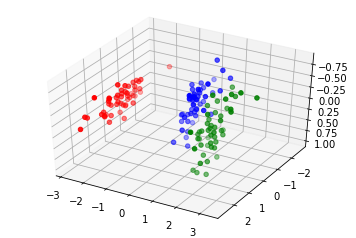

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='b')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='g')
ax.view_init(320,60)
plt.show()

In [27]:
df0, df1, df2 = df[df.Species == 0], df[df.Species == 1], df[df.Species == 2]

In [28]:
df0.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [30]:
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [34]:
df0_mean, df0_sd = df0.mean(axis=0), df0.std(axis=0)

In [35]:
df0_mean, df0_sd

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    0.352490
 Sepal.Width     0.379064
 Petal.Length    0.173664
 Petal.Width     0.105386
 Species         0.000000
 dtype: float64)

In [36]:
df1_mean, df1_sd = df1.mean(axis=0), df1.std(axis=0)
df2_mean, df2_sd = df2.mean(axis=0), df2.std(axis=0)

In [37]:
df0_mean, df1_mean, df2_mean

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    5.936
 Sepal.Width     2.770
 Petal.Length    4.260
 Petal.Width     1.326
 Species         1.000
 dtype: float64, Sepal.Length    6.588
 Sepal.Width     2.974
 Petal.Length    5.552
 Petal.Width     2.026
 Species         2.000
 dtype: float64)

In [73]:
df0_plot, df1_plot, df2_plot = df0.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),\
df1.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),df2.filter(items=['Sepal.Length','Sepal.Width','Petal.Length'])

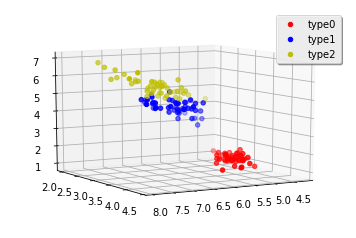

In [115]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='y', label='type2')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

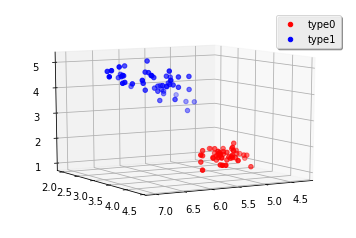

In [116]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

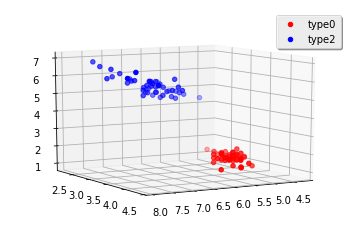

In [117]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.view_init(10,60)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

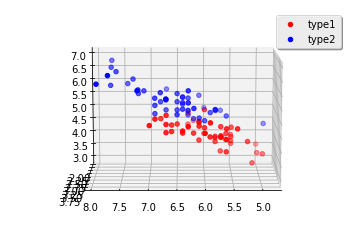

In [118]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='r', label='type1')
ax.view_init(10,90)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

# 予測

In [43]:
df_use = shuffle(df)
df_use

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.7,3.2,1.3,0.2,0
1,4.9,3.0,1.4,0.2,0
111,6.4,2.7,5.3,1.9,2
56,6.3,3.3,4.7,1.6,1
106,4.9,2.5,4.5,1.7,2
133,6.3,2.8,5.1,1.5,2
11,4.8,3.4,1.6,0.2,0
143,6.8,3.2,5.9,2.3,2
60,5.0,2.0,3.5,1.0,1
35,5.0,3.2,1.2,0.2,0


In [49]:
X_train = df_use[:100]
X_val = df_use[100:]
Y_train, Y_val = X_train['Species'], X_val['Species']
X_train, X_val = X_train.drop('Species', axis=1), X_val.drop('Species', axis=1)

In [50]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
2,4.7,3.2,1.3,0.2
1,4.9,3.0,1.4,0.2
111,6.4,2.7,5.3,1.9
56,6.3,3.3,4.7,1.6
106,4.9,2.5,4.5,1.7


In [51]:
Y_train

2      0
1      0
111    2
56     1
106    2
133    2
11     0
143    2
60     1
35     0
97     1
90     1
103    2
83     1
70     1
4      0
13     0
130    2
14     0
105    2
62     1
100    2
17     0
3      0
28     0
53     1
141    2
68     1
36     0
25     0
      ..
138    2
99     1
74     1
107    2
86     1
18     0
49     0
52     1
115    2
31     0
24     0
64     1
136    2
134    2
5      0
20     0
131    2
10     0
23     0
6      0
109    2
63     1
50     1
61     1
78     1
8      0
45     0
0      0
121    2
76     1
Name: Species, Length: 100, dtype: int64

In [53]:
model = svm.SVC()

In [54]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
model.score(X_val, Y_val)

0.97999999999999998

In [60]:
Y_predict = model.predict(X_val)
print(Y_predict, Y_val.as_matrix())

[0 2 2 0 1 2 0 0 0 1 1 1 0 1 1 0 1 2 1 1 2 1 0 0 2 2 2 1 1 2 2 0 2 2 0 2 0
 2 0 2 1 0 1 1 1 2 1 2 1 0] [0 2 2 0 1 2 0 0 0 1 2 1 0 1 1 0 1 2 1 1 2 1 0 0 2 2 2 1 1 2 2 0 2 2 0 2 0
 2 0 2 1 0 1 1 1 2 1 2 1 0]
